In [1]:
import quippy
import ase
from ase.calculators.calculator import all_changes

import logging
logging.basicConfig(level=logging.WARNING)

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
import sys


In [4]:
from collections import OrderedDict

In [5]:
d_list=[0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001, 0.00000001,0.000000001]

In [6]:
version_list=["mbx_pbc","mbx_pbc_no_pips","mbx_pbc_no_2b","mbx_pbc_no_3b","mbx_pbc_no_ww","mbx_pbc_no_mw"]


In [7]:
list_clathrates=["sI","fIIh"]
list_p=["0.0GPa","0.01GPa","0.02GPa","0.03GPa","0.05GPa","0.1GPa",
        "0.2GPa","0.3GPa","0.4GPa","0.5GPa","0.6GPa","0.7GPa",
        "0.8GPa","1GPa","1.2GPa","1.5GPa","2GPa","2.5GPa","3.0GPa","3.5GPa","4GPa"]

In [8]:
nan_virial =[[np.NaN, np.NaN, np.NaN], [np.NaN, np.NaN, np.NaN], [np.NaN, np.NaN, np.NaN]]

In [9]:
dict_clath_p_vers_d_virial=OrderedDict([(clathrate,
                                    OrderedDict([(p,
                                                  OrderedDict([(version,
                                                                OrderedDict([(d,
                                                                              nan_virial)
                                                                             for d in d_list]))
                                                               for version in version_list]))
                                                   for p in list_p]))
                                    for clathrate in list_clathrates])

In [10]:
dict_clath_p_vers_model_virial=OrderedDict([(clathrate,
                                    OrderedDict([(p,
                                                  OrderedDict([(version,
                                                                nan_virial)
                                                               for version in version_list]))
                                                   for p in list_p]))
                                    for clathrate in list_clathrates])

In [11]:
dict_clath_p_volume=OrderedDict([(clathrate,
                                       OrderedDict([(p,
                                                     np.nan)               
                                                    for p in list_p]))
                                    for clathrate in list_clathrates])

In [12]:
my_calculation_root = "test_calc/"

In [13]:
colour_list = ["r","b","c","g",'purple','orange']

In [14]:
marker_list = ["x","o",">","^","<","v"]

In [15]:
for this_clathrate in list_clathrates:
    for this_pressure in list_p:
        my_struct_root = my_calculation_root+this_clathrate+"/pressure_"+this_pressure+"/"
        if os.path.exists(my_struct_root+"test_mbx_pbc_fd_virial_d1e-09.txt"):
            print this_clathrate,this_pressure
            for this_v in version_list:
                print this_v
                dict_clath_p_vers_model_virial[this_clathrate][this_pressure][this_v]=np.loadtxt(my_struct_root+"test_"+this_v+"_virial.txt")
                for tmp_d in d_list[:]:
                    dict_clath_p_vers_d_virial[this_clathrate][this_pressure][this_v][tmp_d]=np.loadtxt(my_struct_root+"test_"+this_v+"_fd_virial_d"+str(tmp_d)+".txt")

            tmp_at = ase.io.read(my_struct_root+"test.xyz")
            dict_clath_p_volume[this_clathrate][this_pressure]=tmp_at.get_volume()

sI 1.2GPa
mbx_pbc
mbx_pbc_no_pips
mbx_pbc_no_2b
mbx_pbc_no_3b
mbx_pbc_no_ww
mbx_pbc_no_mw
sI 3.0GPa
mbx_pbc
mbx_pbc_no_pips
mbx_pbc_no_2b
mbx_pbc_no_3b
mbx_pbc_no_ww
mbx_pbc_no_mw
sI 3.5GPa
mbx_pbc
mbx_pbc_no_pips
mbx_pbc_no_2b
mbx_pbc_no_3b
mbx_pbc_no_ww
mbx_pbc_no_mw
sI 4GPa
mbx_pbc
mbx_pbc_no_pips
mbx_pbc_no_2b
mbx_pbc_no_3b
mbx_pbc_no_ww
mbx_pbc_no_mw
fIIh 0.0GPa
mbx_pbc
mbx_pbc_no_pips
mbx_pbc_no_2b
mbx_pbc_no_3b
mbx_pbc_no_ww
mbx_pbc_no_mw
fIIh 0.5GPa
mbx_pbc
mbx_pbc_no_pips
mbx_pbc_no_2b
mbx_pbc_no_3b
mbx_pbc_no_ww
mbx_pbc_no_mw
fIIh 1GPa
mbx_pbc
mbx_pbc_no_pips
mbx_pbc_no_2b
mbx_pbc_no_3b
mbx_pbc_no_ww
mbx_pbc_no_mw
fIIh 1.5GPa
mbx_pbc
mbx_pbc_no_pips
mbx_pbc_no_2b
mbx_pbc_no_3b
mbx_pbc_no_ww
mbx_pbc_no_mw
fIIh 2.5GPa
mbx_pbc
mbx_pbc_no_pips
mbx_pbc_no_2b
mbx_pbc_no_3b
mbx_pbc_no_ww
mbx_pbc_no_mw
fIIh 3.0GPa
mbx_pbc
mbx_pbc_no_pips
mbx_pbc_no_2b
mbx_pbc_no_3b
mbx_pbc_no_ww
mbx_pbc_no_mw
fIIh 4GPa
mbx_pbc
mbx_pbc_no_pips
mbx_pbc_no_2b
mbx_pbc_no_3b
mbx_pbc_no_ww
mbx_pbc_no_mw


In [16]:
pwd

u'/home/es732/Programs/MBX/my_tests/fd_test_virial'

In [17]:
def plot_abs_error_vs_d(this_clathrate,this_pressure):
    tmp_volume=dict_clath_p_volume[this_clathrate][this_pressure]
    if not np.isnan(tmp_volume):    
        plt.clf()
        for ind,this_v in enumerate(version_list):
            list_dp = []
            for tmp_d in d_list[:]:
                tmp_model =np.array(dict_clath_p_vers_model_virial[this_clathrate][this_pressure][this_v])
                tmp_fd = np.array(dict_clath_p_vers_d_virial[this_clathrate][this_pressure][this_v][tmp_d])


                tmp_dp = 1/3./ase.units.GPa/tmp_volume*np.trace(tmp_fd-tmp_model)
                list_dp.append(tmp_dp)
            #print tmp_model-tmp_fd
            #print tmp_dp
            plt.plot(d_list,np.abs(list_dp),marker = marker_list[ind],fillstyle="none",markersize=15,
                     linestyle='-',label = this_v, c=colour_list[ind])
        #plt.ylabel()
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel("$d/\AA$")
        plt.ylabel("$\Delta p /GPa$")
        plt.legend()
        plt.title(this_clathrate+" "+this_pressure)
        plt.show()

In [18]:
def plot_rel_error_vs_d(this_clathrate,this_pressure):
    tmp_volume=dict_clath_p_volume[this_clathrate][this_pressure]
    if not np.isnan(tmp_volume):    
        plt.clf()
        for ind,this_v in enumerate(version_list):
            list_dp = []
            for tmp_d in d_list[:]:
                tmp_model =np.array(dict_clath_p_vers_model_virial[this_clathrate][this_pressure][this_v])
                tmp_fd = np.array(dict_clath_p_vers_d_virial[this_clathrate][this_pressure][this_v][tmp_d])


                tmp_dp =np.trace(tmp_fd-tmp_model)/np.trace(tmp_model)
                list_dp.append(tmp_dp)
            #print tmp_model-tmp_fd
            #print tmp_dp
            plt.plot(d_list,np.abs(list_dp),marker = marker_list[ind],fillstyle="none",markersize=15,
                     linestyle='-',label = this_v, c=colour_list[ind])
        #plt.ylabel()
        plt.xscale("log")
        plt.yscale("log")
        plt.ylabel("$\Delta p / p $")
        plt.xlabel("$d/\AA$")
        plt.legend()
        plt.title(this_clathrate+" "+this_pressure)
        plt.savefig("virial_fd_test_"+this_clathrate+"_"+this_pressure+".pdf")
        plt.show()

sI 1.2GPa


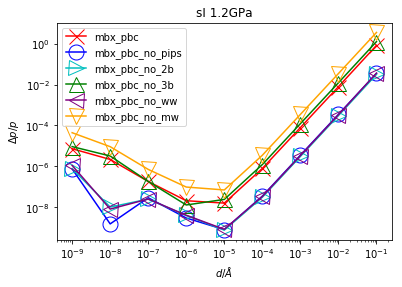

sI 3.0GPa


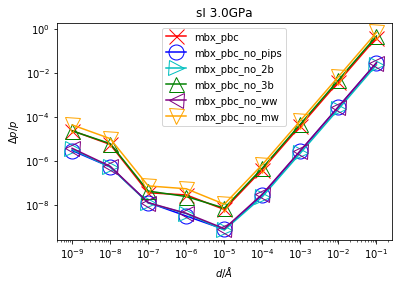

sI 3.5GPa


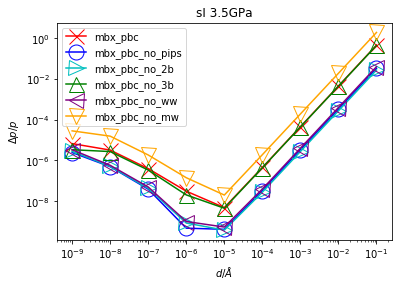

sI 4GPa


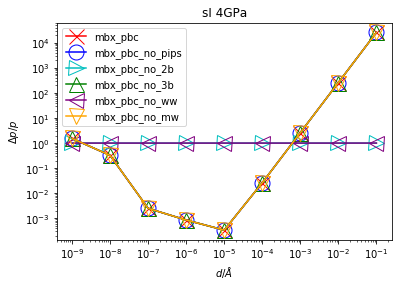

fIIh 0.0GPa


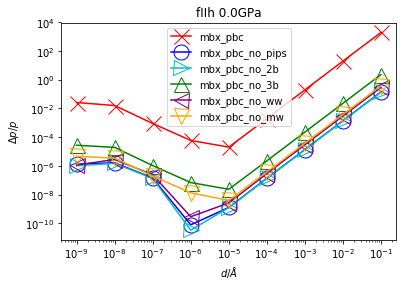

fIIh 0.5GPa


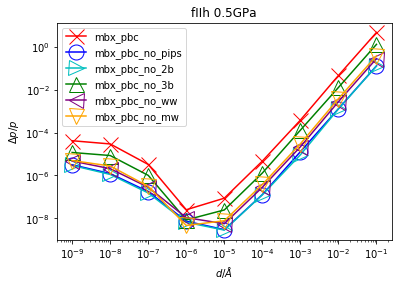

fIIh 1GPa


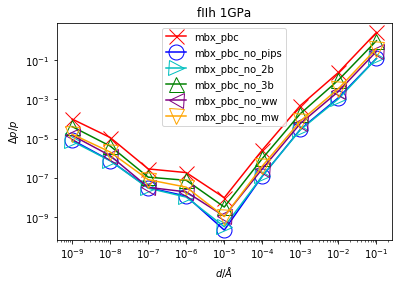

fIIh 1.5GPa


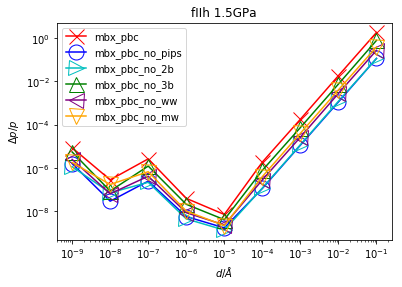

fIIh 2.5GPa


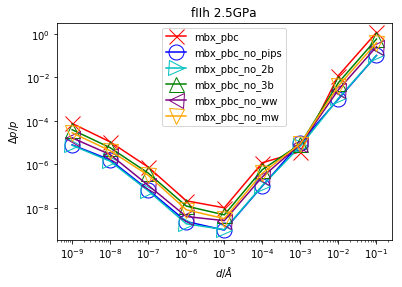

fIIh 3.0GPa


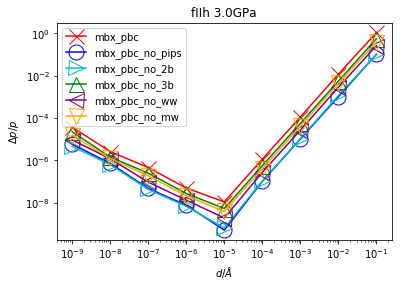

fIIh 4GPa


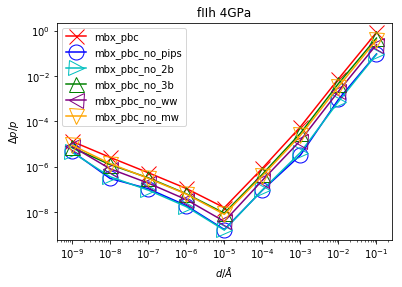

In [19]:
for this_clathrate in list_clathrates:
    for this_pressure in list_p:
        tmp_volume=dict_clath_p_volume[this_clathrate][this_pressure]
        if not np.isnan(tmp_volume):  
            print this_clathrate,this_pressure
            plot_rel_error_vs_d(this_clathrate,this_pressure)

sI 1.2GPa


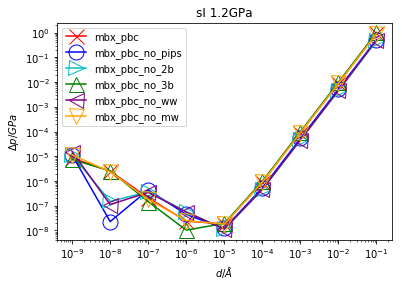

sI 3.0GPa


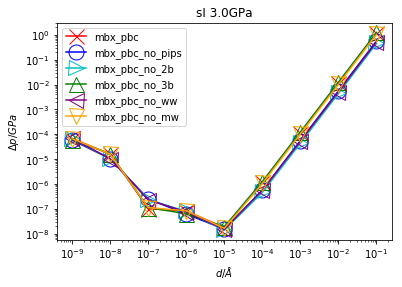

sI 3.5GPa


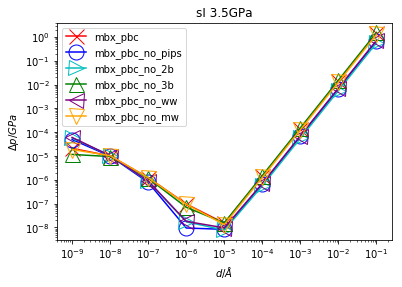

sI 4GPa


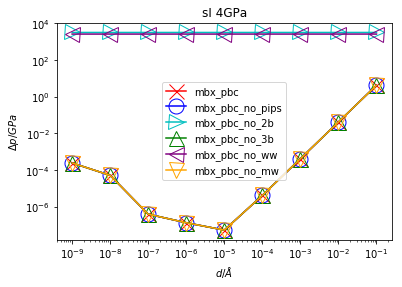

fIIh 0.0GPa


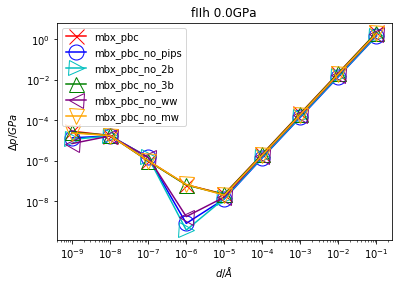

fIIh 0.5GPa


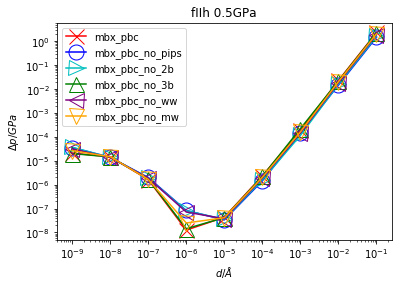

fIIh 1GPa


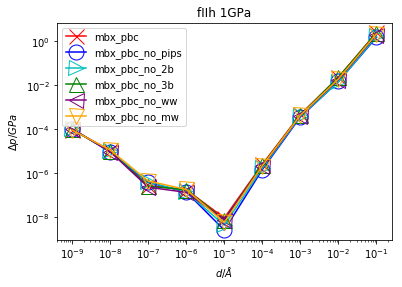

fIIh 1.5GPa


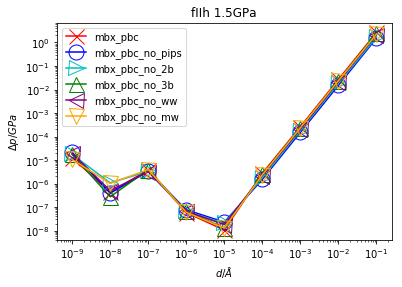

fIIh 2.5GPa


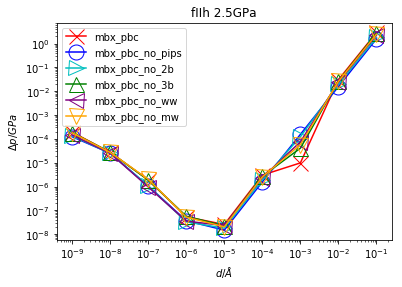

fIIh 3.0GPa


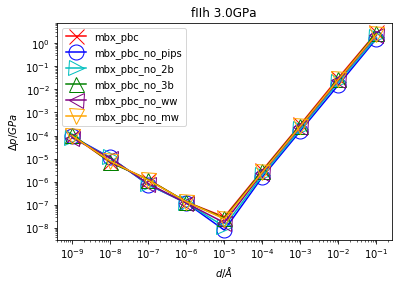

fIIh 4GPa


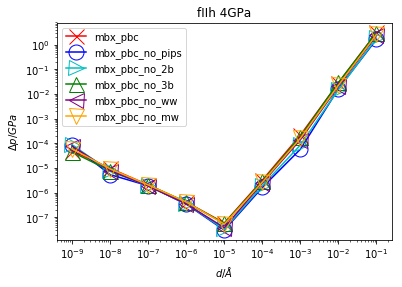

In [20]:
for this_clathrate in list_clathrates:
    for this_pressure in list_p:
        tmp_volume=dict_clath_p_volume[this_clathrate][this_pressure]
        if not np.isnan(tmp_volume):  
            print this_clathrate,this_pressure
            plot_abs_error_vs_d(this_clathrate,this_pressure)

## check separate terms

sI 1.2GPa


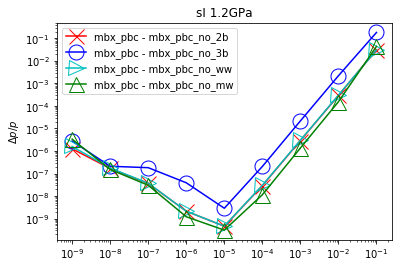

sI 3.0GPa


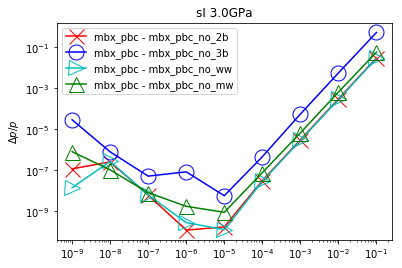

sI 3.5GPa


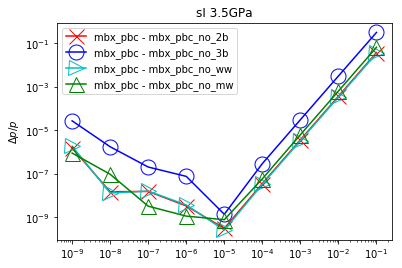

sI 4GPa


/home/es732/miniconda3/envs/mbx-quippy/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/es732/miniconda3/envs/mbx-quippy/lib/python2.7/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


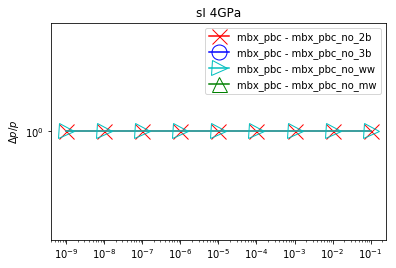

fIIh 0.0GPa


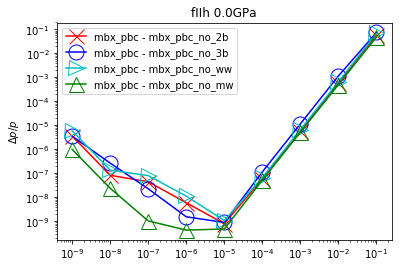

fIIh 0.5GPa


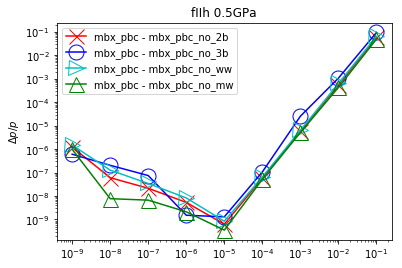

fIIh 1GPa


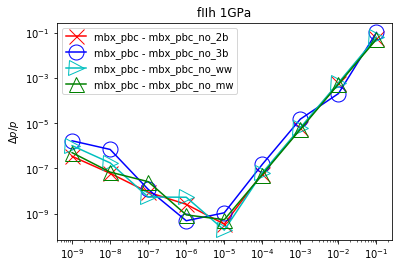

fIIh 1.5GPa


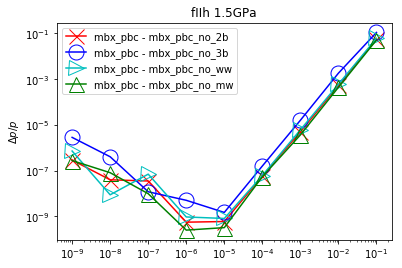

fIIh 2.5GPa


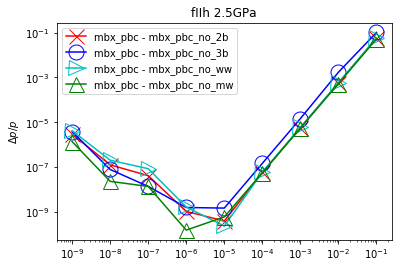

fIIh 3.0GPa


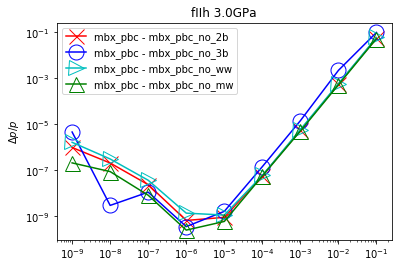

fIIh 4GPa


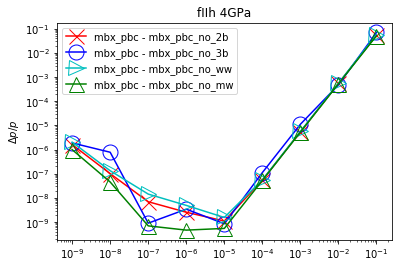

In [21]:
for this_clathrate in list_clathrates:
    for this_pressure in list_p:
        ind=0
        tmp_volume=dict_clath_p_volume[this_clathrate][this_pressure]
        if not np.isnan(tmp_volume):    
            print this_clathrate,this_pressure
            plt.clf()
            this_v1 = "mbx_pbc"
            for this_v2 in ["mbx_pbc_no_2b", "mbx_pbc_no_3b","mbx_pbc_no_ww", "mbx_pbc_no_mw"]:
                list_dp = []
                for tmp_d in d_list[:]:
                    tmp_model_v1 =np.array(dict_clath_p_vers_model_virial[this_clathrate][this_pressure][this_v1])
                    tmp_fd_v1 = np.array(dict_clath_p_vers_d_virial[this_clathrate][this_pressure][this_v1][tmp_d])

                    tmp_model_v2 =np.array(dict_clath_p_vers_model_virial[this_clathrate][this_pressure][this_v2])
                    tmp_fd_v2 = np.array(dict_clath_p_vers_d_virial[this_clathrate][this_pressure][this_v2][tmp_d])

                    tmp_fd_diff = tmp_fd_v1-tmp_fd_v2
                    tmp_model_diff = tmp_model_v1-tmp_model_v2


                    tmp_dp = np.trace(tmp_fd_diff-tmp_model_diff)/np.trace(tmp_model_diff)
                    list_dp.append(tmp_dp)

                #print tmp_model-tmp_fd
                #print tmp_dp
                plt.plot(d_list,np.abs(list_dp),marker = marker_list[ind],fillstyle="none",markersize=15,
                         linestyle='-',label = (this_v1+" - "+this_v2), c=colour_list[ind])
                ind+=1
            plt.xscale("log")
            plt.yscale("log")
            plt.ylabel("$\Delta p / p $")
            plt.legend()
            plt.title(this_clathrate+" "+this_pressure)
            plt.show()

sI 1.2GPa


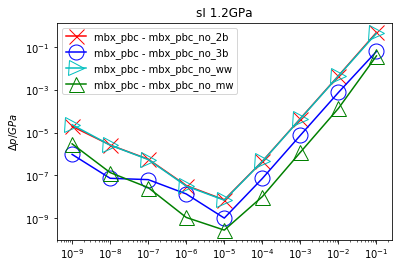

sI 3.0GPa


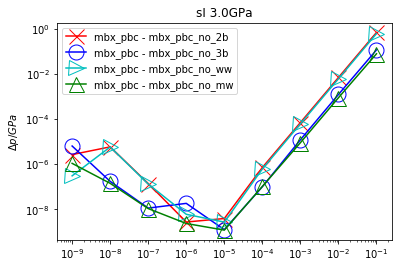

sI 3.5GPa


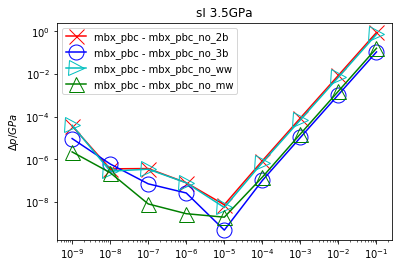

sI 4GPa


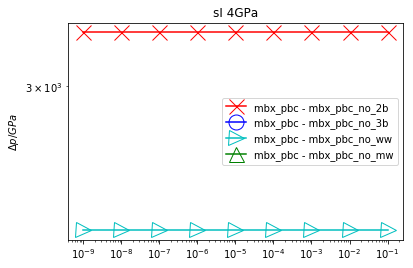

fIIh 0.0GPa


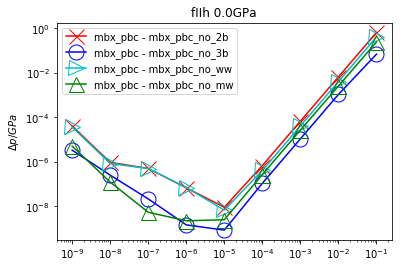

fIIh 0.5GPa


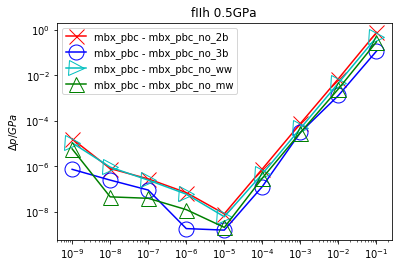

fIIh 1GPa


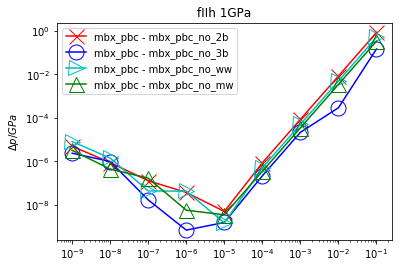

fIIh 1.5GPa


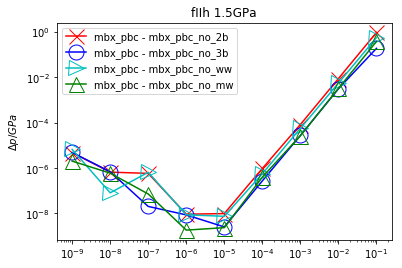

fIIh 2.5GPa


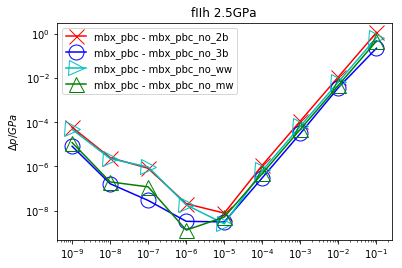

fIIh 3.0GPa


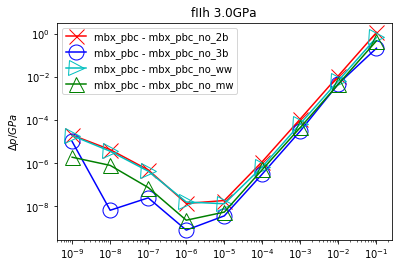

fIIh 4GPa


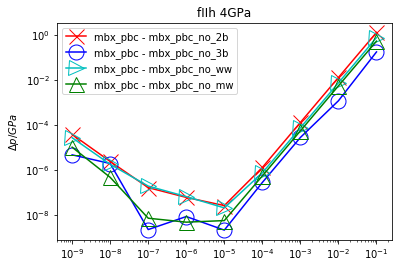

In [22]:
for this_clathrate in list_clathrates:
    for this_pressure in list_p:
        ind=0
        tmp_volume=dict_clath_p_volume[this_clathrate][this_pressure]
        if not np.isnan(tmp_volume):    
            print this_clathrate,this_pressure
            plt.clf()

            this_v1 = "mbx_pbc"
            for this_v2 in ["mbx_pbc_no_2b", "mbx_pbc_no_3b","mbx_pbc_no_ww", "mbx_pbc_no_mw"]:
                list_dp = []
                for tmp_d in d_list[:]:
                    tmp_model_v1 =np.array(dict_clath_p_vers_model_virial[this_clathrate][this_pressure][this_v1])
                    tmp_fd_v1 = np.array(dict_clath_p_vers_d_virial[this_clathrate][this_pressure][this_v1][tmp_d])

                    tmp_model_v2 =np.array(dict_clath_p_vers_model_virial[this_clathrate][this_pressure][this_v2])
                    tmp_fd_v2 = np.array(dict_clath_p_vers_d_virial[this_clathrate][this_pressure][this_v2][tmp_d])

                    tmp_fd_diff = tmp_fd_v1-tmp_fd_v2
                    tmp_model_diff = tmp_model_v1-tmp_model_v2


                    tmp_dp = 1/3./ase.units.GPa/tmp_volume*np.trace((tmp_fd_diff-tmp_model_diff))
                    list_dp.append(tmp_dp)

                #print tmp_model-tmp_fd
                #print tmp_dp
                plt.plot(d_list,np.abs(list_dp),marker = marker_list[ind],fillstyle="none",markersize=15,
                         linestyle='-',label = (this_v1+" - "+this_v2), c=colour_list[ind])
                ind+=1
            #plt.ylabel()
            plt.xscale("log")
            plt.yscale("log")
            plt.ylabel("$\Delta p / GPa $")
            plt.legend()
            plt.title(this_clathrate+" "+this_pressure)
            plt.show()

### test sI structure at 4 GPa (very compressed but still surprising that it the PIPs seems to give back 0-s)

In [23]:
dict_clath_p_vers_model_virial["sI"]["4GPa"]

OrderedDict([('mbx_pbc', array([[ 0.00926673,  0.00058154, -0.00027488],
                     [ 0.00058154,  0.00477534, -0.00066772],
                     [-0.00027488, -0.00066772,  0.00778213]])),
             ('mbx_pbc_no_pips',
              array([[ 0.00926673,  0.00058154, -0.00027488],
                     [ 0.00058154,  0.00477534, -0.00066772],
                     [-0.00027488, -0.00066772,  0.00778213]])),
             ('mbx_pbc_no_2b',
              array([[-150886.74447839,  -19914.34308532,  -16097.25552103],
                     [ -19914.34308532, -134334.08978226,   22102.6325968 ],
                     [ -16097.25552103,   22102.6325968 , -146607.51604622]])),
             ('mbx_pbc_no_3b', array([[ 0.00926673,  0.00058154, -0.00027488],
                     [ 0.00058154,  0.00477534, -0.00066772],
                     [-0.00027488, -0.00066772,  0.00778213]])),
             ('mbx_pbc_no_ww',
              array([[-120031.13482305,  -22154.89019888,  -16759.36956929],

In [24]:
dict_clath_p_vers_model_virial["sI"]["4GPa"]["mbx_pbc"]/ase.units.kcal*ase.units.mol

array([[ 0.21369594,  0.01341069, -0.0063389 ],
       [ 0.01341069,  0.11012203, -0.01539789],
       [-0.0063389 , -0.01539789,  0.17946016]])

In [25]:
ase.units.mol

6.022140857e+23

In [26]:
tmp_stress = np.array([[-1.2750106004567193e-06, -2.24406346e-315, -0.0], [-2.24406346e-315, -6.571465872679336e-07, -0.0], [-0.0, -0.0, -1.0698746917680216e-06]])
tmp_volume=dict_clath_p_volume["sI"]["4GPa"]
print tmp_stress*tmp_volume

[[-9.27148967e-003 -1.63181476e-311 -0.00000000e+000]
 [-1.63181476e-311 -4.77857031e-003 -0.00000000e+000]
 [-0.00000000e+000 -0.00000000e+000 -7.77980368e-003]]


In [27]:
dict_clath_p_vers_model_virial["sI"]["4GPa"]["mbx_pbc"]/tmp_volume

array([[ 1.27435647e-06,  7.99734495e-08, -3.78014620e-08],
       [ 7.99734495e-08,  6.56702795e-07, -9.18239003e-08],
       [-3.78014620e-08, -9.18239003e-08,  1.07019446e-06]])

In [28]:
tmp_stress

array([[-1.27501060e-006, -2.24406346e-315, -0.00000000e+000],
       [-2.24406346e-315, -6.57146587e-007, -0.00000000e+000],
       [-0.00000000e+000, -0.00000000e+000, -1.06987469e-006]])

In [29]:
tmp_volume

7271.6961501775895

In [30]:
this_v1 ="mbx_pbc"
virial1 = dict_clath_p_vers_model_virial["sI"]["4GPa"][this_v1]
for this_v in version_list:
    print this_v,"-",this_v1
    virial2=dict_clath_p_vers_model_virial["sI"]["4GPa"][this_v]
    print virial1-virial2

mbx_pbc - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_pips - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_2b - mbx_pbc
[[150886.75374512  19914.34366686  16097.25524615]
 [ 19914.34366686 134334.0945576  -22102.63326452]
 [ 16097.25524615 -22102.63326452 146607.52382835]]
mbx_pbc_no_3b - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_ww - mbx_pbc
[[120031.14408978  22154.89078042  16759.36929441]
 [ 22154.89078042 109175.90859244 -22915.9288216 ]
 [ 16759.36929441 -22915.9288216  122822.53809126]]
mbx_pbc_no_mw - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [31]:

this_v1 ="mbx_pbc"
for tmp_d in d_list:
    print tmp_d
    virial1 = dict_clath_p_vers_d_virial["sI"]["4GPa"][this_v1][tmp_d]
    for this_v in version_list:
        print this_v,"-",this_v1
        virial2=dict_clath_p_vers_d_virial["sI"]["4GPa"][this_v][tmp_d]
        print virial1-virial2

0.1
mbx_pbc - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_pips - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_2b - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_3b - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_ww - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_mw - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
0.01
mbx_pbc - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_pips - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_2b - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_3b - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_ww - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_mw - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
0.001
mbx_pbc - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_pips - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_2b - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_3b - mbx_pbc
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
mbx_pbc_no_ww - mbx_p